<h3>Import Module</h3>

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.preprocessing import StandardScaler

<h3>Data Cleaning</h3>

In [117]:
df = pd.read_csv('https://raw.githubusercontent.com/Keipatr/Customer-Analysis-Clustering/main/customer_analysis.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [118]:
# Check missing value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

52247.25135379061
51381.5


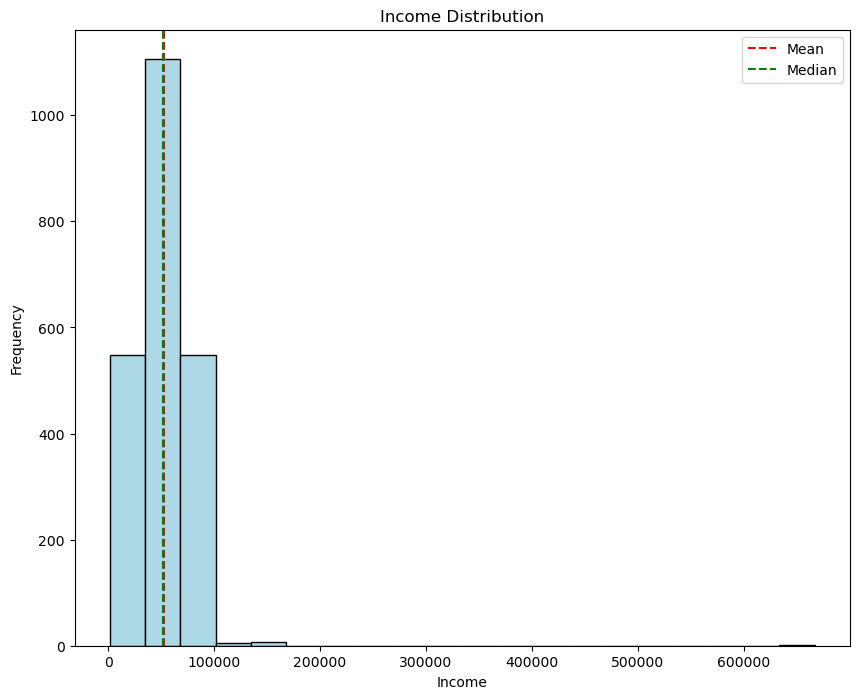

In [119]:
mean = df['Income'].mean()
median = df['Income'].median()
print(mean )
print(median)
plt.figure(figsize=(10, 8))
plt.hist(df['Income'], bins=20, color='lightblue', edgecolor='black')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(median, color='green', linestyle='dashed', linewidth=1.5)
plt.legend({'Mean': mean, 'Median': median})
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [120]:
# fill the missing value in the income
df['Income'].fillna(df['Income'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [121]:
# change dt_customer to date time format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

<h3><b>Feature Enginering</h3>

In [122]:
label_encoder = LabelEncoder()

# Encode the categorical features
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

# Display the first few rows of the dataset to confirm the changes
df[['Education', 'Marital_Status']].head()

,Education,Marital_Status
0,2,4
1,2,4
2,2,5
3,2,5
4,4,3


In [123]:
# Calculate the age of each customer using the current year and their birth year
df['Age'] =  datetime.now().year - df['Year_Birth']

# Display the first few rows to confirm the new feature
df[['Year_Birth', 'Age']].head()

,Year_Birth,Age
0,1957,66
1,1954,69
2,1965,58
3,1984,39
4,1981,42


In [124]:
# List of expenditure-related columns
expenditure_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate the total expenditure across various categories
df['Spent'] = df[expenditure_columns].sum(axis=1)

# Display the first few rows to confirm the new feature
df[['Spent'] + expenditure_columns].head()

,Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1617,635,88,546,172,88,88
1,27,11,1,6,2,1,6
2,776,426,49,127,111,21,42
3,53,11,4,20,10,3,5
4,422,173,43,118,46,27,15


In [125]:
# Define a function to derive the "Living_With" feature based on "Marital_Status"
def living_with(status):
    if status in [0, 1, 2, 4, 6]:  # 'Absurd', 'Alone', 'YOLO', 'Widow', 'Absurd'
        return 'Alone'
    elif status in [3, 5]:  # 'Married', 'Together'
        return 'Partner'

# Apply the function to the "Marital_Status" column to create the "Living_With" feature
df['Living_With'] = df['Marital_Status'].apply(living_with)

# Display the first few rows to confirm the new feature
df[['Marital_Status', 'Living_With']].head()

,Marital_Status,Living_With
0,4,Alone
1,4,Alone
2,5,Partner
3,5,Partner
4,3,Partner


In [126]:
# Calculate the total number of children (both young ones and teenagers) in a household
df['Children'] = df['Kidhome'] + df['Teenhome']

# Display the first few rows to confirm the new feature
df[['Kidhome', 'Teenhome', 'Children']].head()

,Kidhome,Teenhome,Children
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1


In [127]:
# Calculate the family size based on the number of children and the marital status
df['Family_Size'] = df['Children'] + df['Living_With'].apply(lambda x: 2 if x == 'Partner' else 1)

# Display the first few rows to confirm the new feature
df[['Living_With', 'Children', 'Family_Size']].head()

,Living_With,Children,Family_Size
0,Alone,0,1
1,Alone,2,3
2,Partner,0,2
3,Partner,1,3
4,Partner,1,3


In [128]:
# Determine if a customer is a parent based on the number of children
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)

# Display the first few rows to confirm the new feature
df[['Children', 'Is_Parent']].head()

,Children,Is_Parent
0,0,0
1,2,1
2,0,0
3,1,1
4,1,1


In [129]:
# Define a function to categorize the education level
def categorize_education(level):
    if level in [0, 1]:  # '2n Cycle', 'Basic'
        return '0'
    elif level in [2, 3]:  # 'Graduation', 'Master'
        return '1'
    else:  # 'PhD'
        return '2'

# Apply the function to the "Education" column to create the new categorization
df['Education'] = df['Education'].apply(categorize_education)

# Display the first few rows to confirm the changes
df['Education'].head()


0    1
1    1
2    1
3    1
4    2
Name: Education, dtype: object

In [130]:
# Drop redundant columns
df = df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

<h3><b>Data Preparation</h3>

In [132]:
df['Living_With'] = label_encoder.fit_transform(df['Living_With'])
df['Education'] = label_encoder.fit_transform(df['Education'])

In [133]:
features_to_scale = df.drop(['Response'], axis=1).columns

# Initialize the standard scaler
scaler = StandardScaler()

# Apply scaling to the features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the first few rows after scaling
df[features_to_scale].head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.180372,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.28014,-0.262111,-0.11651,-0.097282,0.985345,1.679417,-1.346889,-1.264505,-1.759115,-1.584605
1,-0.180372,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.28014,-0.262111,-0.11651,-0.097282,1.235733,-0.961275,-1.346889,1.396361,0.446548,0.631072
2,-0.180372,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.28014,-0.262111,-0.11651,-0.097282,0.317643,0.282673,0.736696,-1.264505,-0.656283,-1.584605
3,-0.180372,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.28014,-0.262111,-0.11651,-0.097282,-1.268149,-0.918094,0.736696,0.065928,0.446548,0.631072
4,1.583966,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.28014,-0.262111,-0.11651,-0.097282,-1.017761,-0.305254,0.736696,0.065928,0.446548,0.631072
